In [ ]:
#hide
%load_ext autoreload
%autoreload 2

# pantograph_constructor

> This package provides all functionality from graph construction (currently, from annotation, in the future, from raw assembled sequences) to graph processing (sorting, grouping, adjusting). 

>It also provides universal graph data model class `GenomeGraph`, which implements graph IO through GFA v1 (in the future also v2 format) as well as all operations on the graph.

## Install

`pip install your_project_name`

## How to use

In [ ]:
from nbdev.export import notebook2script

In [ ]:
import os
import glob
import re

import networkx as nx

from pangraph_constructor.graph import GenomeGraph
from pangraph_constructor.synteny import generateOrder,readTransMap
from pangraph_constructor.tree import TremauxTree

In [ ]:
import warnings
warnings.simplefilter('ignore')

In [ ]:
datadir = '../../1001G/annotation'
gfadir = '../../1001G/pantograph/data'

In [ ]:
datadir = '.'
gfadir = '.'

In [ ]:
annotationFiles = sorted(glob.glob(f'{datadir}{os.path.sep}*.gff'))
sequenceFiles = sorted(glob.glob(f'{datadir}{os.path.sep}sequences{os.path.sep}*.fasta'))
transMapFile = f'{datadir}{os.path.sep}stats{os.path.sep}TransMap.map'

In [ ]:
annotationFiles,sequenceFiles,transMapFile

(['../../1001G/annotation/10002.gff',
  '../../1001G/annotation/10015.gff',
  '../../1001G/annotation/10024.gff',
  '../../1001G/annotation/1741.gff',
  '../../1001G/annotation/35-1.gff',
  '../../1001G/annotation/6024.gff',
  '../../1001G/annotation/6069.gff',
  '../../1001G/annotation/6124.gff',
  '../../1001G/annotation/6244.gff',
  '../../1001G/annotation/6909.gff',
  '../../1001G/annotation/6966.gff',
  '../../1001G/annotation/8236.gff',
  '../../1001G/annotation/85-3.gff',
  '../../1001G/annotation/9075.gff',
  '../../1001G/annotation/9537.gff',
  '../../1001G/annotation/9543.gff',
  '../../1001G/annotation/9638.gff',
  '../../1001G/annotation/9728.gff',
  '../../1001G/annotation/9764.gff',
  '../../1001G/annotation/9888.gff',
  '../../1001G/annotation/9905.gff',
  '../../1001G/annotation/A1.gff',
  '../../1001G/annotation/ET-86.gff',
  '../../1001G/annotation/Elh-2.gff',
  '../../1001G/annotation/R1.gff',
  '../../1001G/annotation/TIAR10.gff',
  '../../1001G/annotation/Taz-0.gff

In [ ]:
fileOrder = generateOrder(annotationFiles)
fileOrder

[25,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 26]

In [ ]:
# doCigars = False
doUS = False
gfaFilename = 'AT_Chr1_OGOnly_all.gfa'
seqSuffix = '_Chr1'

In [ ]:
gfaFilename = 'shorttest.gfa'

In [ ]:
graph = GenomeGraph(annotationFiles=annotationFiles,fileOrder=fileOrder,doUS=doUS,seqSuffix=seqSuffix)

In [ ]:
graph.toGFA(f'./test_long_graph.gfa',doSeq=False)

# Loading graph from GFA

## Large graph

In [ ]:
graph_new = GenomeGraph(gfaPath='./test_long_graph.gfa',isGFASeq=False)

In [ ]:
len(graph_new.accessions)

27

In [ ]:
graph_new.treeSort()

In [ ]:
len(graph_new.order),len(graph_new.nodes),len(graph_new.tremauxTree),len(graph_new.tremauxTree.originalGraph)

(8087, 8087, 8087, 8087)

In [ ]:
gfaFilename

'AT_Chr1_OGOnly_all.gfa'

In [ ]:
gfadir

'../../1001G/pantograph/data'

In [ ]:
graph_new.toGFA(f'{gfadir}{os.path.sep}{gfaFilename}',doSeq=False)

## Small simple graph

In [ ]:
graph2 = GenomeGraph(gfaPath='./shorttest.gfa',isGFASeq=False)

In [ ]:
graph2.paths

[['1+', '3+', '4+', '5+', '6+', '7+', '8+'],
 ['2+', '3-', '4-', '6+', '4+', '5+', '9+']]

In [ ]:
graph2.treeSort()

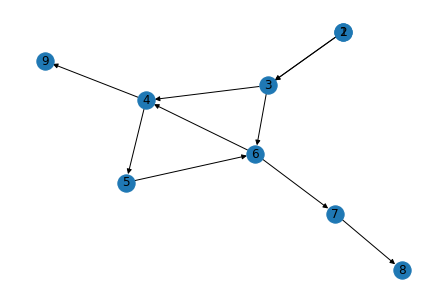

In [ ]:
graph2.tremauxTree.draw_original()

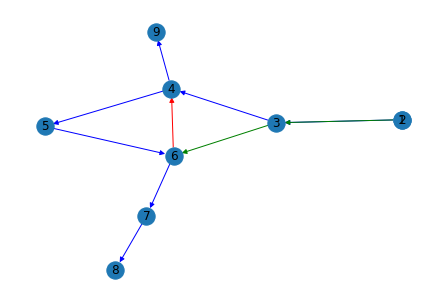

In [ ]:
graph2.tremauxTree.draw()

In [ ]:
graph2.order

[1, 3, 4, 5, 6, 7, 8, 9, 2]

In [ ]:
graph2.toGFA('../../1001G/pantograph/data/shorttest1.gfa',doSeq=False)

## Small graph with complex loops

In [ ]:
graph3 = GenomeGraph(gfaPath='./shorttest2.gfa',isGFASeq=False)

In [ ]:
graph3.paths

[['2+', '4+', '7+', '1+'],
 ['2+', '3+', '5+', '6+', '2+'],
 ['1+', '2+', '4+', '7+'],
 ['4+', '7+', '1+', '2+', '3+', '5+'],
 ['5+', '6+', '2+', '4+', '7+']]

In [ ]:
graph3.treeSort()

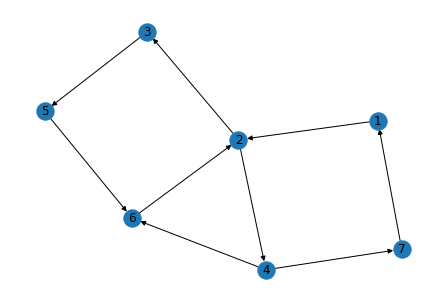

In [ ]:
graph3.tremauxTree.draw_original()

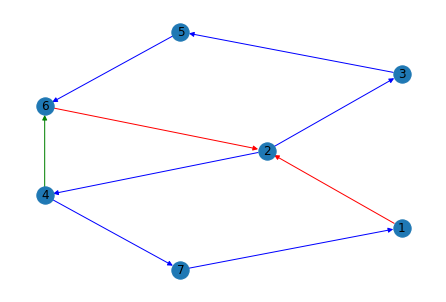

In [ ]:
graph3.tremauxTree.draw()

In [ ]:
graph3.order

[2, 4, 7, 1, 3, 5, 6]

In [ ]:
graph3.toGFA('../../1001G/pantograph/data/shorttest2.gfa',doSeq=False)

## Small graph with very complex relationships

In [ ]:
graph4 = GenomeGraph(gfaPath='./shorttest3.gfa',isGFASeq=False)

In [ ]:
graph4.paths

[['1+', '2+', '7+', '3+', '4+', '5+', '6+'],
 ['1+', '7+', '2+', '3+', '4+', '5+', '6+'],
 ['1+', '2+', '3+', '7+', '4+', '5+', '6+'],
 ['1+', '3+', '2+', '7+', '4+', '5+', '6+'],
 ['1+', '4+', '5+', '6+', '7+', '3+', '2+'],
 ['1+', '2+', '3+', '4+', '5+', '7+', '6+']]

In [ ]:
graph4.treeSort()

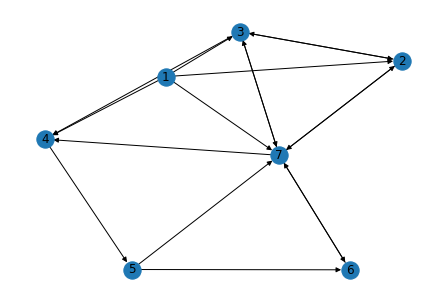

In [ ]:
graph4.tremauxTree.draw_original()

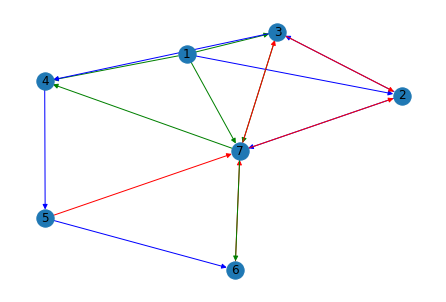

In [ ]:
graph4.tremauxTree.draw()

In [ ]:
graph4.order

[1, 2, 3, 4, 5, 6, 7]

In [ ]:
graph4.toGFA('../../1001G/pantograph/data/shorttest3.gfa',doSeq=False)

## Small graph with self-loops

In [ ]:
graph5 = GenomeGraph(gfaPath='./shorttest_loop.gfa',isGFASeq=False)

In [ ]:
graph5.paths

[['1+', '3+', '4+', '4+', '5+', '6+', '7+', '8+'],
 ['2+', '3-', '4-', '6+', '4+', '5+', '9+']]

In [ ]:
graph5.treeSort()

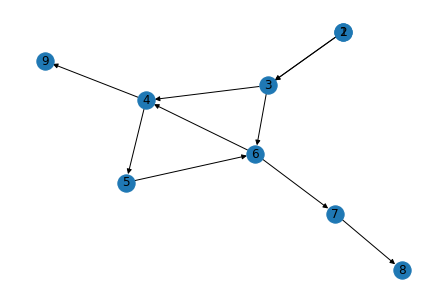

In [ ]:
graph5.tremauxTree.draw_original()

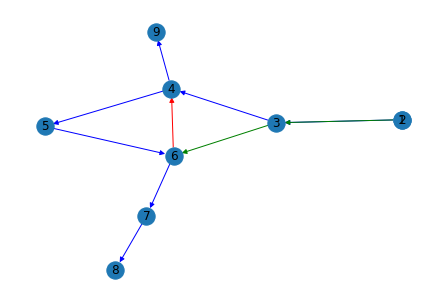

In [ ]:
graph5.tremauxTree.draw()

In [ ]:
graph5.order

[1, 3, 4, 5, 6, 7, 8, 9, 2]

In [ ]:
graph5.toGFA('../../1001G/pantograph/data/shorttest4.gfa',doSeq=False)